<a href="https://colab.research.google.com/github/VidyaValsalan/Prediction-with-DeepLearning/blob/master/LSTM-RL-Prediction/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import files

In [4]:
uploaded = files.upload()

Saving excel_model_15.csv to excel_model_15.csv


In [44]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "excel_model_15.csv" with length 2599 bytes


In [100]:
import io
df1 = pd.read_csv(io.StringIO(uploaded['excel_model_15.csv'].decode('utf-8')),names=['date','loc1','loc2','loc3','loc4','loc5'])
df1.head(5)
a=input('enter the location')

enter the locationloc2


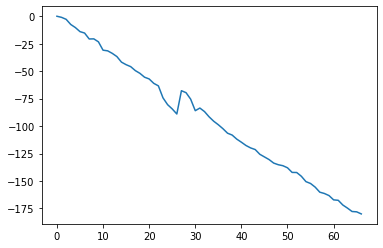

In [101]:
df1=df1.reset_index()[a]
df1.plot()

In [102]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [103]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [104]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [105]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [106]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [108]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [109]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 4, 50)             10400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 4, 50)             20200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=800,batch_size=64,verbose=1)

Epoch 1/800
1/1 [==============================] - 0s 47ms/step - loss: 7.9889e-04 - val_loss: 1.7687e-04
Epoch 2/800
1/1 [==============================] - 0s 19ms/step - loss: 7.9857e-04 - val_loss: 1.7554e-04
Epoch 3/800
1/1 [==============================] - 0s 24ms/step - loss: 7.9825e-04 - val_loss: 1.7469e-04
Epoch 4/800
1/1 [==============================] - 0s 18ms/step - loss: 7.9793e-04 - val_loss: 1.7305e-04
Epoch 5/800
1/1 [==============================] - 0s 29ms/step - loss: 7.9762e-04 - val_loss: 1.7225e-04
Epoch 6/800
1/1 [==============================] - 0s 24ms/step - loss: 7.9730e-04 - val_loss: 1.7082e-04
Epoch 7/800
1/1 [==============================] - 0s 19ms/step - loss: 7.9698e-04 - val_loss: 1.6966e-04
Epoch 8/800
1/1 [==============================] - 0s 19ms/step - loss: 7.9667e-04 - val_loss: 1.6863e-04
Epoch 9/800
1/1 [==============================] - 0s 20ms/step - loss: 7.9635e-04 - val_loss: 1.6715e-04
Epoch 10/800
1/1 [============================

In [120]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [121]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [122]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

76.93817963352963

In [123]:
math.sqrt(mean_squared_error(ytest,test_predict))

161.95618956216055

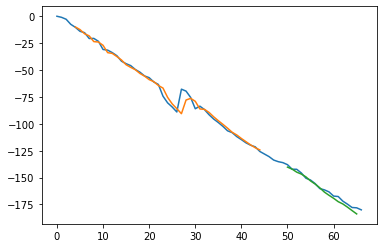

In [124]:
import matplotlib.pyplot as plt
look_back=4
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [129]:
x_input=test_data[17:].reshape(1,-1)
x_input.shape


(1, 4)

In [130]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [133]:
temp_input

[0.029444444444444495, 0.012222222222222134, 0.01055555555555554, 0.0]